# Introduction:

---



There are two kinds of sorting algorithms, O(n²) and O(n*log(n)).  O(n²) takes more time but comparatively less space while O(n*log(n)) algorithms take less time but comparatively more space as described by <a href="https://www.computer.org/profiles/donald-knuth"><b>Knuth</b></a>.
So, O(n²) is preferred over small arrays and O(n*log(n)) is preferred over large arrays.

The most commonly used sorting algorithms are.
* Quick Sort `O(nlog(n))`
* Bubble Sort `O(n²)`
* Merge Sort `O(nlog(n))`
* Insertion Sort `O(n²)`
* Selection Sort `O(n²)`
* Heap Sort `O(nlog(n))`
* Radix Sort `O(d*(n+b))` (where d is the number of digits in the given list, n is the number of elements in the list)
* Bucket Sort `O(n + k)`

But this time, the sorting algorithm which we are going to discuss is not present in this list. Let's start it.

# **Interpolation Sort:**


---



Before starting anything, it is important to know why it is necessary for us.

Interpolation sort is a new sorting algorithm that derives its motivation from the Interpolation search. It shows a high probability to show O(n) time complexity for well-distributed data.

## **Explanation of the Algotithm:**




The algorithm can be better understood if preceded by an example. So this section will aim at explaining the algorithm with an example and then discuss how to implement the same in reality. 

Consider the following unsorted array of size 15:


```
[61 , 53 , 42 , 14 , 64 , 2 , -2 , 6 , 17 , 9 , 11 , 3 , 3 , 4 , 7]
```

The backbone of the sorting algorithm is the interpolation formula:


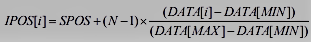

Where,

* IPOS[i] -> Interpolated position of the ith element of the
unsorted array.
* SPOS -> Starting index of the array.
*   N -> Number of the elements in the array.
*   DATA[i] -> Data at the ith position of the array.
*   DATA[MIN] -> Smallest data of the array.
*   DATA[MAX] -> Largest data of the array.

(It should be noted that the division performed in the formula is integer division (decimal part ignored).)

For the given array,
* SPOS = 1
* N= 15
* DATA[MIN]= -2
* DATA[MAX]= 64

Substituting these values in the interpolation formula we
get the interpolated positions of the elements as.



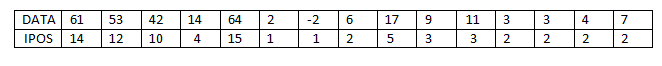

Rearranging the array from smaller to bigger IPOS we get:

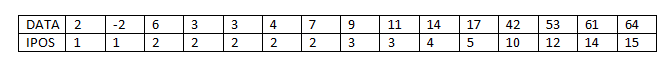

So we see that most of the elements got sorted but there are few groups of elements whose IPOS values turned out to be the same. These groups of elements are treated as sub-arrays. **The above technique is applied on each of these sub-arrays until we get no further sub-arrays.**

## **Implementation:**


---



* **Input** : The unsorted array, size of the array.
* **Output**: Sorted array.



In [ ]:
/*
  Java program
  Interpolation Sort
*/
import java.util.*;
public class InterpolationSort {

	// Display elements of given sequence

	public static void display(int[] sequence, int size) {
		for (int i = 0; i < size; ++i) {
			System.out.print("  " + sequence[i]);
		}
		System.out.print("\n");
	}


	// Sort elements using interpolation sort

	public static void interpolationSort(int[] sequence, int size) {

		if (size <= 0) {
			return;
		}

		int start = 0;
		int end = size;
		int location = 0;
		int slot = 0;

		// Loop controlling variables
		int i = 0;
		int j = 0;

		// Define min max variable
		int min = 0;
		int max = 0;

		ArrayList<Integer> process = new ArrayList<Integer>();
		ArrayList<ArrayList<Integer>> bucket = new ArrayList<ArrayList<Integer>>();

		// Assign the memory of each slot

		for (i = 0; i < size; ++i) {
			// Allocate memory
			bucket.add(new ArrayList<Integer>());
		}

		// Add the size of array
		process.add(size);

		while (process.size() > 0) {

			// Get last size

			location = process.get(process.size() - 1);

			// Remove the last element of process
			process.remove(process.size() - 1);

			// Get start location
			start = end - location;

			// Get starting element
			max = sequence[start];
			min = sequence[start];

			// Find minimum and maximum
			for (i = start + 1; i < end; i++) {

				if (sequence[i] > max) {
					max = sequence[i];
				} else if (sequence[i] < min) {
					min = sequence[i];
				}
			}

			if (min == max) {

				// Change last element
				end = end - location;
			} else {
				for (i = start; i < end; ++i) {

					// Calculate slot

					slot = (int) Math.floor(((sequence[i] - min) / (double) (max - min)) * (location - 1));
					bucket.get(slot).add(sequence[i]);
				}
				for (i = 0; i < location; ++i) {
					if (bucket.get(i).isEmpty() == false) {

						// When bucket slot not empty
						// Assign the bucket element into actual array

						for (j = 0; j < bucket.get(i).size(); j++) {
							sequence[start] = bucket.get(i).get(j);
							start++;
						}

						// This is useful to trace the sort slot elements
						process.add(bucket.get(i).size());
					}
				}

				// Remove the existing bucket element
				for (i = 0; i < size; ++i) {
					bucket.get(i).clear();
				}
			}
		}
	}

	public static void main(String[] args) {

		// Define array of positive integer elements

		int[] s1 =  { 61, 53, 42, 14, 64, 2, -2, 6, 17, 9, 11, 3, 3, 4, 7};
		int[] s2 =  {16, 12, 6, 2, 8, 5, 9, 3, 5, 21, 22};

		// Test case A

		int size = s1.length;
		System.out.print("  Before Sort \n");
		display(s1, size);
		System.out.print("  After Sorted \n");
		interpolationSort(s1, size);
		display(s1, size);

		// Test case B

		size = s2.length;
		System.out.print("\n  Array \n");
		display(s2, size);
		interpolationSort(s2, size);
		System.out.print("  After Sorted \n");
		display(s2, size);
	}
}



---
**Output:**


```
 Before Sort 
  61  53  42  14  64  2  -2  6  17  9  11  3  3  4  7
  After Sorted 
  -2  2  3  3  4  6  7  9  11  14  17  42  53  61  64

  Array 
  16  12  6  2  8  5  9  3  5  21  22
  After Sorted 
  2  3  5  5  6  8  9  12  16  21  22

Process finished with exit code 0


```




## **Time and Space Complexity:** 

---



 * **Worst case performance:**      `O(n²)`
 * **Best case performance:**       `O(n)`
 * **Average case performance:**    `O(n+k)`

 * **Worst case space complexity:** `O(n*3)`

## **Limitations:**


---



*  Large code size 
*  Taking a lot of RAM for sorting.
*  It can't be used to sort large strings. 